In [46]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [47]:
import numpy as np
import pandas as pd

from scipy.stats import ttest_ind as t_test

In [48]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [52]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

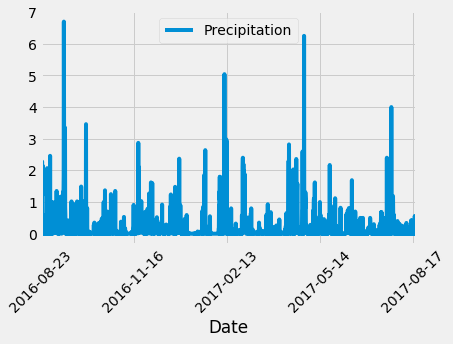

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

   

# Calculate the date 1 year ago from the last data point in the database

date=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

data=session.query(measurement.date,measurement.prcp).filter(measurement.date>=date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column

df=pd.DataFrame(data,columns=['Date','Precipitation'])
# Sort the dataframe by date



df.set_index('Date',inplace=True)

df_date_sort=df.sort_values(by='Date').dropna().copy()


# Use Pandas Plotting with Matplotlib to plot the data



df_date_sort.plot()
Axes =plt.subplot()
plt.xticks(rotation=45)
plt.show()

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_date_sort.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [59]:
# Design a query to show how many stations are available in this dataset?
session.query(station.name,station.id,station.station).all()

[('WAIKIKI 717.2, HI US', 1, 'USC00519397'),
 ('KANEOHE 838.1, HI US', 2, 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 3, 'USC00514830'),
 ('PEARL CITY, HI US', 4, 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 5, 'USC00518838'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 6, 'USC00519523'),
 ('WAIHEE 837.5, HI US', 7, 'USC00519281'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 8, 'USC00511918'),
 ('MANOA LYON ARBO 785.2, HI US', 9, 'USC00516128')]

In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_station_list=session.query(station.name,measurement.station,func.count(measurement.date)).filter(station.station==measurement.station).group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()
most_active_station_list

most_active_station=most_active_station_list[0][1]

In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station==most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

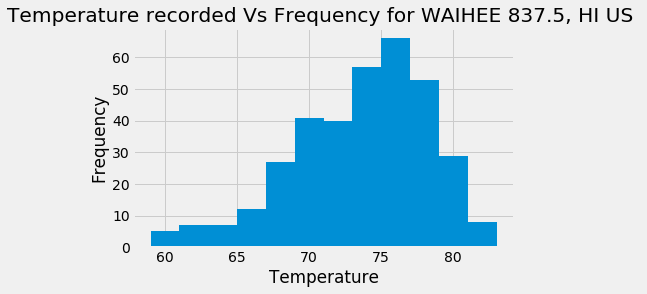

In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_temp=session.query(station.name,measurement.station,func.count(measurement.tobs)).filter(station.station==measurement.station).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).first()

data1=session.query(measurement.tobs).filter(measurement.date>=date).filter(measurement.station==most_temp[1]).all()

df1=pd.DataFrame(data1, columns=['Temperature'])



df1.hist(bins=12)
plt.tight_layout()
plt.title(f'Temperature recorded Vs Frequency for {most_temp[0]} ')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I

In [161]:
measurement_df=pd.read_csv('Resources/hawaii_measurements.csv')
stations_df=pd.read_csv('Resources/hawaii_stations.csv')

In [162]:
measurement_df['date']=pd.to_datetime(measurement_df['date'])

dec_data=measurement_df[measurement_df['date'].dt.month==12]
june_data=measurement_df[measurement_df['date'].dt.month==6]

In [163]:
a=dec_data.groupby('date').mean()
b=june_data.groupby('date').mean()
t_test(a['tobs'],b['tobs'])

Ttest_indResult(statistic=-19.320515481847366, pvalue=3.602668975563456e-61)

### Used the unpaired T-test as the samples were from two different population groups (June and December). The p value is 3.6 which signifies that the two populations are different and there is a statistically significant difference between the two. 

## Temperature Analysis II

In [115]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-09-25', '2016-10-05'))

[(73.0, 78.28767123287672, 82.0)]


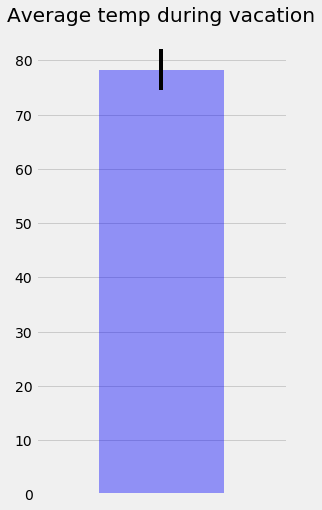

In [164]:
data=calc_temps('2016-09-25', '2016-10-05')



plt.figure(figsize=(4,8))
plt.bar(1,data[0][1],width=0.05,yerr=[data[0][1]-data[0][2]],color='blue', alpha=0.4)
plt.title("Average temp during vacation")
plt.ylim(0,data[0][2]+4)
plt.xlim(0.95,1.05)

plt.tick_params(axis='x',labelbottom=False)
plt.grid(axis='x')

plt.show()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [200]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

In [203]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

start_date="2017-09-25"
end_date="2017-10-05"

# Use the start and end date to create a range of dates
vacation=pd.date_range(start="2017-09-25",end="2017-10-05")

# Stip off the year and save a list of %m-%d strings
vacation_clean=vacation.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date

vacation_data=[]

for date in vacation_clean:
    vacation_data.append(daily_normals(date)[0])


In [230]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
Vacation_df=pd.DataFrame(vacation_data, columns=['min','avg','max'])

Vacation_df['Dates']=vacation

Vacation_df=Vacation_df.set_index("Dates")

Vacation_df

,min,avg,max
Dates,,,
2017-09-25,69.0,76.148936,83.0
2017-09-26,66.0,75.640000,85.0
2017-09-27,68.0,75.640000,83.0
2017-09-28,67.0,76.134615,84.0
2017-09-29,68.0,75.978723,83.0
2017-09-30,67.0,75.306122,83.0
2017-10-01,69.0,75.229167,80.0
2017-10-02,70.0,76.260000,83.0
2017-10-03,66.0,76.730769,84.0


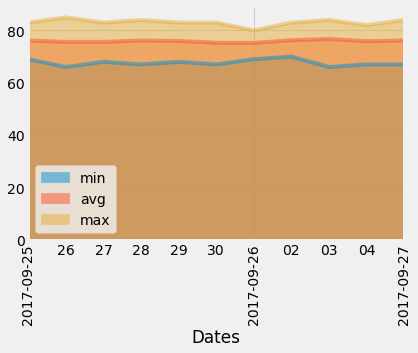

In [240]:
# Plot the daily normals as an area plot with `stacked=False`


ax=Vacation_df.plot(kind='area',stacked=False, label=True)
ax.set_xticklabels(vacation.date, rotation=90)

plt.show()

